In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df=df.drop_duplicates()

In [8]:
df["Selling_type"].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [9]:
df["Transmission"].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [10]:
df=df.drop(columns=["Car_Name"])

In [11]:
df1=pd.get_dummies(df,dtype='int')

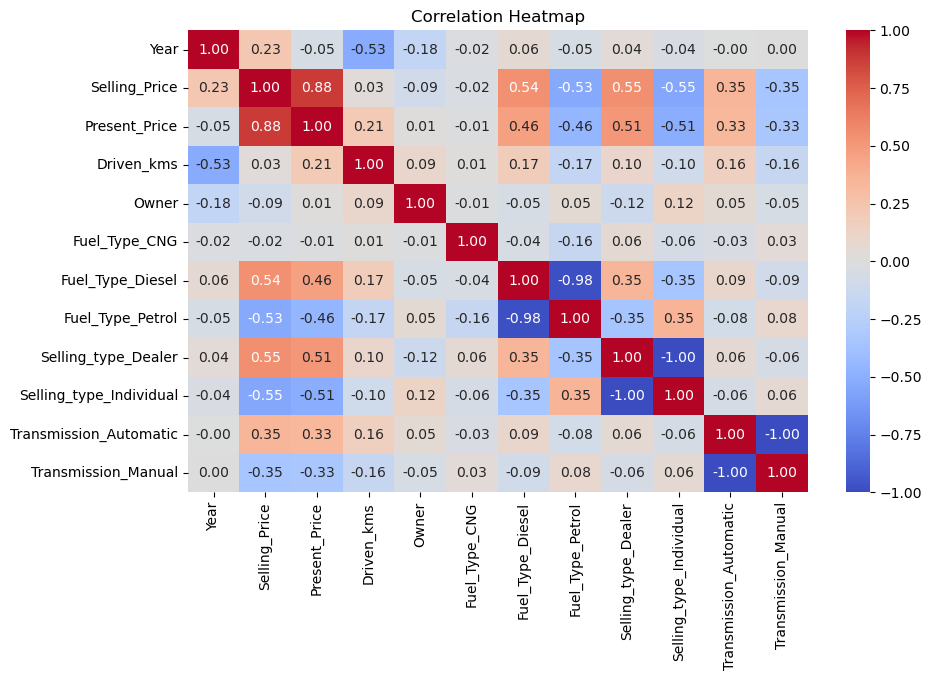

In [12]:
corr=df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

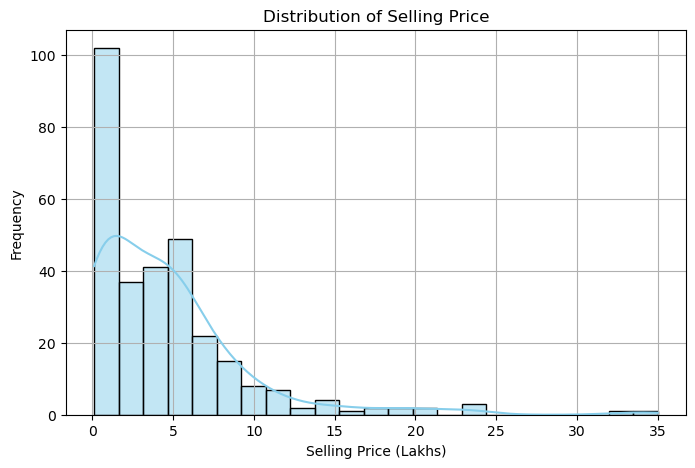

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df["Selling_Price"], kde=True, color='skyblue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (Lakhs)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

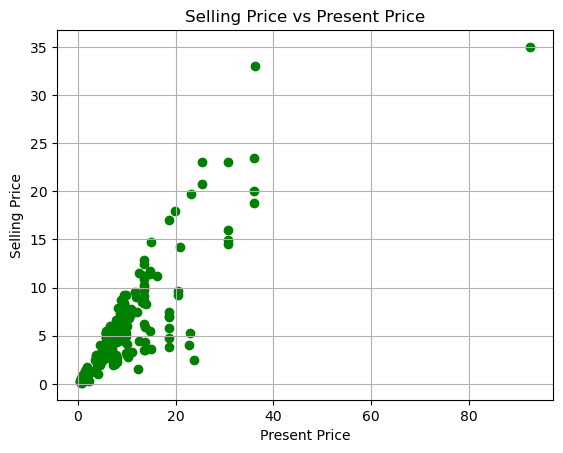

In [15]:
plt.scatter(df['Present_Price'], df['Selling_Price'], color='green')
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

In [16]:
df1.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [17]:
X=df1.drop(columns=["Selling_Price"])
Y=df1["Selling_Price"]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression
md=LinearRegression()

In [20]:
md.fit(X_train,Y_train)
y_pr=md.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f"MAE = {mean_absolute_error(Y_test,y_pr)}")
print(f"MSE = {mean_squared_error(Y_test,y_pr)}")
print(f"R2 = {r2_score(Y_test,y_pr)}")

MAE = 1.1481336569043894
MSE = 2.569305079340382
R2 = 0.887242673923723


In [22]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
Y_pr1=dt.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f"MAE = {mean_absolute_error(Y_test,Y_pr1)}")
print(f"MSE = {mean_squared_error(Y_test,Y_pr1)}")
print(f"R2 = {r2_score(Y_test,Y_pr1)}")

MAE = 0.666
MSE = 1.626323333333333
R2 = 0.9286266656783306


In [24]:
from sklearn.ensemble import RandomForestRegressor
md=RandomForestRegressor(n_estimators=100, max_depth=10)
md.fit(X_train,Y_train)
Y_pr=md.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f"MAE = {mean_absolute_error(Y_test,Y_pr)}")
print(f"MSE = {mean_squared_error(Y_test,Y_pr)}")
print(f"R2 = {r2_score(Y_test,Y_pr)}")

MAE = 0.5132841035247429
MSE = 0.7338510723877982
R2 = 0.9677939823783401
